# Ukeoppgaver – Interpolasjon

---

## Oppgaver for hånd

---

### Oppgave 1 – Lagrange-polynom for hånd
Gitt punktene  
$(x_0, y_0) = (0,1)$,  
$(x_1, y_1) = (1,3)$,  
$(x_2, y_2) = (2,2)$.

1. Finn **Lagrange-interpolasjons-polynomet** $p(x)$ som går gjennom disse punktene.  
2. Beregn $p(1.5)$.  
3. Sammenlign med lineær interpolasjon mellom $x=1$ og $x=2$.  

---

### Oppgave 2 – Feilledd i Lagrange-interpolasjon
Anta at den eksakte funksjonen er $f(x) = e^x$ og at vi interpolerer den i punktene $x_0=0$, $x_1=1$, og $x_2=2$.

1. Skriv ned uttrykket for **feilleddet** i Lagrange-interpolasjon:
   $$R_2(x) = \frac{f^{(3)}(\xi)}{3!}(x - x_0)(x - x_1)(x - x_2),$$
   for et $\xi \in [0,2]$.
   og estimer maksimalfeilen for $x=1.5$.  
2. Finn Lagrande interpolasjonspolynomet $p(x)$ til $f$ gitt punktene.
3. Sammenlign med den faktiske feilen mellom $e^{1.5}$ og Lagrande interpolasjonsverdien $p(1.5)$.  

---

### Oppgave 3 – Newtons dividerte differanser
Gitt punktene $(1, 1)$, $(2, 4)$, $(3, 9)$.

1. Sett opp tabellen for **Newtons dividerte differanser**.  
2. Skriv ned polynomet i Newton-formen.  
3. Bruk **Horners regel** til å vise hvordan det kan evalueres effektivt.  

---

## Digitale oppgaver (Python)

---

### Oppgave 4 – Lagrange-interpolasjon og Runges fenomen
Bruk funksjonen $f(x) = \frac{1}{1 + 25x^2}$ på intervallet $[-1,1]$.

1. Lag to sett med interpolasjonspunkter:
   - 6 jevnt fordelte punkter  
   - 12 jevnt fordelte punkter  
2. Konstruer Lagrange-polynomet for hvert sett og plott begge sammen med den eksakte funksjonen.  
3. Diskuter **Runges fenomen** — hva skjer når antallet punkter øker?  

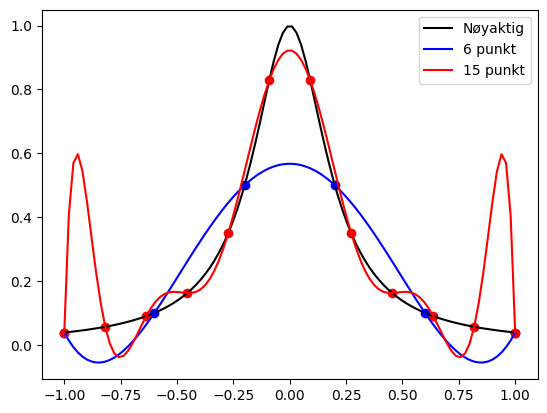

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

def f(x):
    # Regner ut funksjonsverdien i et punkt
    return 1/(1+25*x**2)


def lagrande_interpolasjon(x, px, py):
    # Gitt en liste med punkt px og py vi skal interpolere
    # Regn ut y-verdien til lagrande-polynomet i punktet x

    n = len(px) # hvor mange baser har vi?

    y = 0 # Start med at verdien er 0
    
    for i in range(n): # Regn ut base "i"
        L_i = py[i]

        for j in range(n): # Gang sammen alle faktorene
            if i == j:
                continue # Hopp over (x_i - x_i)

            L_i *= (x - px[j]) / (px[i] - px[j])

        # Legg sammen verdien til denne basen
        y += L_i 
    
    return y 


xs_mange = np.linspace(-1,1, 100)
ys_mange = f(xs_mange)


xs_6 = np.linspace(-1,1,6)
ys_6 = f(xs_6)
ys_lagrande_6 = lagrande_interpolasjon(xs_mange, xs_6, ys_6)

xs_12 = np.linspace(-1,1,12)
ys_12 = f(xs_12)
ys_lagrande_12 = lagrande_interpolasjon(xs_mange, xs_12, ys_12)


plt.plot(xs_mange, ys_mange, c='black', label='Nøyaktig')
plt.plot(xs_mange, ys_lagrande_6, c='blue', label='6 punkt')
plt.scatter(xs_6, ys_6, c='blue')
plt.plot(xs_mange, ys_lagrande_12, c='red', label='15 punkt')
plt.scatter(xs_12, ys_12, c='red')
plt.legend()






---

### Oppgave 5 – Newtons dividerte differanser (kode)
Lag en funksjon `newton_interp(x, y, x_eval)` som:

1. Beregner de **dividerte differansene** til punktene `(x, y)`.  
2. Evaluerer polynomet i punktene `x_eval` ved hjelp av **Horners regel**.  
3. Test funksjonen på punktene fra Oppgave 1 og sammenlign resultatet med `scipy.interpolate.lagrange`.  

In [15]:
import numpy as np

def divided_differences(x, y):
    n = len(x)
    coef = np.copy(y).astype(float)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x[j:n] - x[0:n-j])
    return coef  # coef[0]=f[x0], coef[1]=f[x0,x1], ...

def newton_eval(coef, x_nodes, x):
    # Horner evaluering for Newton-form
    n = len(coef)
    result = coef[-1]
    for k in range(n-2, -1, -1):
        result = result*(x - x_nodes[k]) + coef[k]
    return result

# Test på punktene fra Oppgave 1 i håndoppgavene
x = np.array([0.,1.,2.])
y = np.array([1.,3.,2.])
coef = divided_differences(x, y)
xs = np.linspace(0,2,5)
ys = [newton_eval(coef, x, xi) for xi in xs]
print("coef:", coef)
print("eval:", ys)

coef: [ 1.   2.  -1.5]
eval: [np.float64(1.0), np.float64(2.375), np.float64(3.0), np.float64(2.875), np.float64(2.0)]


---

### Oppgave 6 – Feilledd og konvergens
Bruk funksjonen $f(x) = \sin(x)$ på intervallet $[0,\pi]$.

1. Lag en løkke som interpolerer $f(x)$ med $n=2,4,6,8,10$ punkter.  
2. For hvert $n$, beregn maksimalfeilen mellom $f(x)$ og interpolasjonen på et fint rutenett.  
3. Plott feilen som funksjon av $n$.  
4. Hva observerer du om konvergensen?  

2 0.9999996912662217
4 0.04361577292202068
6 0.0013129725442145301
8 2.4381940542356206e-05
10 3.0066998743527584e-07


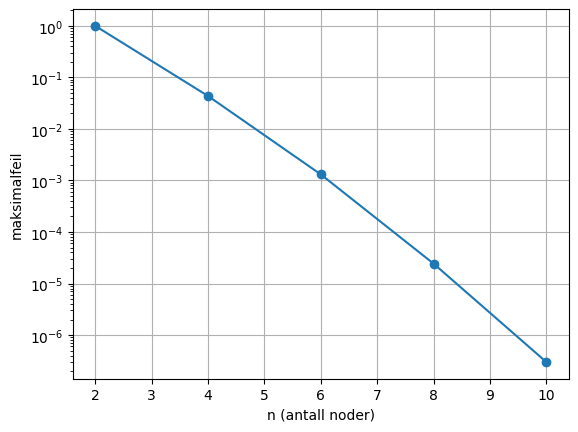

In [ ]:
import numpy as np
from scipy.interpolate import BarycentricInterpolator
import matplotlib.pyplot as plt

def max_error(n):
    x_nodes = np.linspace(0, np.pi, n)
    y_nodes = np.sin(x_nodes)
    interp = BarycentricInterpolator(x_nodes, y_nodes)
    x_test = np.linspace(0, np.pi, 2000)
    err = np.max(np.abs(np.sin(x_test) - interp(x_test)))
    return err

ns = [2,4,6,8,10]
errs = [max_error(n) for n in ns]
for n,e in zip(ns, errs):
    print(n, e)

plt.semilogy(ns, errs, '-o')
plt.xlabel('n (antall noder)')
plt.ylabel('maksimalfeil')
plt.grid()
plt.show()


---

### Oppgave 7 – Splines (praktisk)
Gitt data fra temperaturen gjennom en dag:
| Tid (timer) | Temperatur (Celcius) |
|------------|------------------|
| 0          | 14              |
| 4          | 13              |
| 8          | 16              |
| 12          | 22              |
| 16          | 25              |
| 20          | 20              |
| 24          | 16              |

1. Bruk `scipy.interpolate.CubicSpline` til å lage:
   - En **natural spline**
   - En **clamped spline** der du antar at $f'(0)=0$  
2. Plott begge splinene og dataene.  
3. Kommenter forskjellen i kurveform og glatthet.  

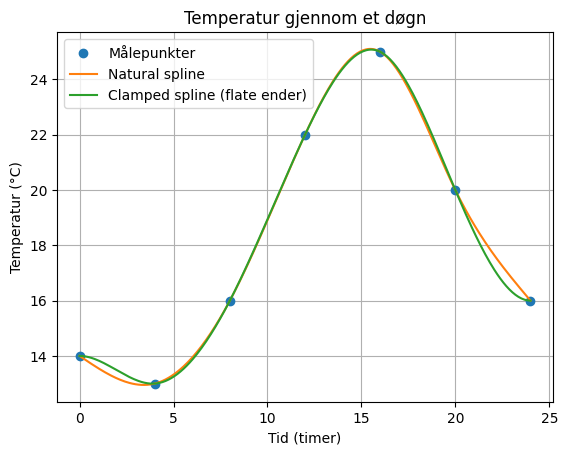

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Tid (i timer)
x = np.array([0, 4, 8, 12, 16, 20, 24])
# Temperatur i grader Celsius (omtrent som en typisk sommerdag)
y = np.array([14, 13, 16, 22, 25, 20, 16])

# Natural spline
cs_nat = CubicSpline(x, y, bc_type='natural')

# Clamped spline — start og slutt med flate helninger (f'(0)=0, f'(24)=0)
cs_clamped = CubicSpline(x, y, bc_type=((1, 0.0), (1, 0.0)))

xx = np.linspace(0, 24, 300)
plt.plot(x, y, 'o', label='Målepunkter')
plt.plot(xx, cs_nat(xx), label='Natural spline')
plt.plot(xx, cs_clamped(xx), label="Clamped spline (flate ender)")
plt.xlabel('Tid (timer)')
plt.ylabel('Temperatur (°C)')
plt.title('Temperatur gjennom et døgn')
plt.legend()
plt.grid(True)
plt.show()


---

### Oppgave 8 – Tegn en bokstav med splines
Du skal lage en enkel digital signatur eller bokstavform ved hjelp av splines.

1. Definer noen håndplukkede punkter som danner f.eks. bokstaven `S` eller `G`.  
2. Bruk `scipy.interpolate.splprep` og `splev` for å lage en **parametrisk B-spline** gjennom punktene.  
3. Plott resultatet med Matplotlib. 

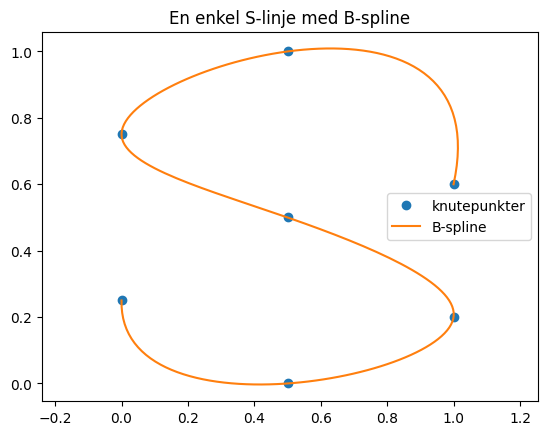

In [28]:
# Oppgave 8: Parametrisk B-spline for bokstav 'S' (eksempel)
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Punkter omtrent som en 'S'
pts = np.array([
    [1, 0.6],
    [0.5, 1],
    [0.0, 0.75],
    [0.5, 0.5],
    [1, 0.2],
    [0.5, 0],
    [0, 0.25]
]).T  # shape (2, N)

tck, u = splprep(pts, s=0, k=3)
u_fine = np.linspace(0,1,200)
x_spline, y_spline = splev(u_fine, tck)

plt.plot(pts[0], pts[1], 'o', label='knutepunkter')
plt.plot(x_spline, y_spline, '-', label='B-spline')
plt.axis('equal')
plt.legend()
plt.title('En enkel S-linje med B-spline')
plt.show()
